In [32]:
import numpy as np
import pandas as pd
% matplotlib inline

In [33]:
df = pd.read_csv("loan_new.csv")

In [34]:
df.shape

(887379, 15)

In [35]:
df = df.sample(frac=0.2)

In [36]:
df.shape

(177476, 15)

In [37]:
df.head()

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,earliest_cr_line,revol_bal,revol_util,total_acc
486732,6400,36 months,12.59,C,C2,6 years,MORTGAGE,25000.0,Verified,Current,34.85,Mar-1994,14776.0,69.7,16.0
374356,14400,60 months,14.99,C,C5,10+ years,MORTGAGE,62000.0,Source Verified,Current,28.94,Sep-1991,15020.0,39.6,34.0
747161,6400,36 months,7.26,A,A4,8 years,RENT,60000.0,Source Verified,Current,14.06,Mar-2000,5475.0,33.8,23.0
8561,2500,36 months,5.42,A,A1,10+ years,OWN,48000.0,Not Verified,Fully Paid,9.20,Jan-1995,1421.0,4.6,17.0
330352,18000,36 months,6.03,A,A1,10+ years,MORTGAGE,160000.0,Verified,Fully Paid,20.93,Nov-1995,26011.0,55.9,33.0


In [38]:
df.emp_length = np.where(df.emp_length == "10+ years", ">=10", "<10")

In [39]:
df.home_ownership = np.where(df.home_ownership.isin(["OTHER", "NONE", "ANY"]), "MORTGAGE", df.home_ownership)

In [40]:
df.dti = np.where(df.dti > 40, 40, df.dti)

In [41]:
df.revol_bal = np.where(df.revol_bal > 50000, 50000,  df.revol_bal)

In [42]:
df.revol_util = np.where(df.revol_util > 100, 100,  df.revol_util)

In [43]:
df.annual_inc = np.where(df.annual_inc > 150000, 150000, df.annual_inc)

In [44]:
df.columns

Index(['funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'dti', 'earliest_cr_line', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [45]:
X = df[['funded_amnt', 'term', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 
       'dti', 'revol_bal', 'revol_util']]

In [46]:
y = df['int_rate']

In [47]:
numerical_variable = ["funded_amnt", "annual_inc", "dti", "revol_bal", "revol_util"]
categorical_variable = ["term", "emp_length", "home_ownership", "verification_status"]

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [49]:
numerical_transformer = Pipeline(steps=[
    ('missing_value_handler', SimpleImputer(strategy="median")),
    ('scaling', StandardScaler())
])

In [50]:
categorical_transformer = Pipeline(steps=[
    ('missing_value_handler', SimpleImputer(strategy="most_frequent")),
    ('one_hot_encoding', OneHotEncoder(sparse=False))
])

In [51]:
preprocessor = ColumnTransformer(transformers=[
    ('numeric_transform', numerical_transformer, numerical_variable),
    ('categorical_transformer', categorical_transformer, categorical_variable)
])

In [52]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [53]:
model_1 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('linear_model', LinearRegression())
])

In [54]:
model_2 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('ridge_model', Ridge(alpha=0.1))
])

In [55]:
model_3 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('lasso_model', Lasso(alpha=0.1))
])

In [56]:
from sklearn.neighbors import KNeighborsRegressor
model_4 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('knn_model', KNeighborsRegressor(n_neighbors=7))
])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [58]:
model_1.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numeric_transform', Pipeline(memory=None,
     steps=[('missing_value_handler', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
  ...r_model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [59]:
model_2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numeric_transform', Pipeline(memory=None,
     steps=[('missing_value_handler', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
  ...it_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [60]:
model_3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numeric_transform', Pipeline(memory=None,
     steps=[('missing_value_handler', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
  ...e=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [61]:
model_4.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numeric_transform', Pipeline(memory=None,
     steps=[('missing_value_handler', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
  ...wski',
          metric_params=None, n_jobs=None, n_neighbors=7, p=2,
          weights='uniform'))])

In [62]:
y_pred_1 = model_1.predict(X_test)

In [63]:
y_pred_2 = model_2.predict(X_test)

In [64]:
y_pred_3 = model_3.predict(X_test)

In [65]:
y_pred_4 = model_4.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred_1))

3.5942499874718807

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred_2))

3.594207994961242

In [68]:
np.sqrt(mean_squared_error(y_test, y_pred_3))

3.6231237571807524

In [69]:
np.sqrt(mean_squared_error(y_test, y_pred_4))

3.7078558395337256

## COmbine

In [74]:
import numpy as np
import pandas as pd
% matplotlib inline

In [75]:
df = pd.read_csv("../session3/loan_new.csv")

In [76]:
df.shape

(887379, 15)

In [77]:
df = df.sample(frac=0.2)

In [78]:
df.shape

(177476, 15)

In [79]:
df.head()

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,earliest_cr_line,revol_bal,revol_util,total_acc
465894,15000,36 months,10.99,B,B2,10+ years,MORTGAGE,95000.0,Source Verified,Current,2.11,Feb-1985,7568.0,74.2,19.0
733856,15600,60 months,9.17,B,B2,2 years,MORTGAGE,36000.0,Source Verified,Current,13.71,Jun-2000,14347.0,80.2,15.0
37557,11500,36 months,12.21,B,B5,4 years,RENT,73000.0,Source Verified,Fully Paid,1.05,Feb-1999,19.0,0.2,11.0
191336,6075,36 months,14.33,C,C1,< 1 year,MORTGAGE,22880.0,Source Verified,Fully Paid,6.62,Dec-2002,11263.0,90.1,11.0
598206,18075,60 months,15.61,D,D1,8 years,MORTGAGE,70000.0,Not Verified,Current,37.91,Apr-1992,62668.0,73.6,21.0


In [80]:
df.emp_length = np.where(df.emp_length == "10+ years", ">=10", "<10")

In [81]:
df.home_ownership = np.where(df.home_ownership.isin(["OTHER", "NONE", "ANY"]), "MORTGAGE", df.home_ownership)

In [82]:
df.dti = np.where(df.dti > 40, 40, df.dti)

In [83]:
df.revol_bal = np.where(df.revol_bal > 50000, 50000,  df.revol_bal)

In [84]:
df.revol_util = np.where(df.revol_util > 100, 100,  df.revol_util)

In [85]:
df.annual_inc = np.where(df.annual_inc > 150000, 150000, df.annual_inc)

In [86]:
df.loan_status = np.where(df.loan_status.isin(['Current', 'Fully Paid']), 0, 1)

In [87]:
df.columns

Index(['funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'dti', 'earliest_cr_line', 'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [88]:
X = df[['funded_amnt', 'term', 'emp_length', 'int_rate',
       'home_ownership', 'annual_inc', 'verification_status', 
       'dti', 'revol_bal', 'revol_util']]

In [89]:
y = df['loan_status']

In [90]:
y.unique()

array([0, 1])

In [91]:
numerical_variable = ["funded_amnt", "annual_inc", "dti", "revol_bal", "revol_util", 'int_rate']
categorical_variable = ["term", "emp_length", "home_ownership", "verification_status"]

In [92]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [93]:
numerical_transformer = Pipeline(steps=[
    ('missing_value_handler', SimpleImputer(strategy="median")),
    ('scaling', StandardScaler())
])

In [94]:
categorical_transformer = Pipeline(steps=[
    ('missing_value_handler', SimpleImputer(strategy="most_frequent")),
    ('one_hot_encoding', OneHotEncoder(sparse=False))
])

In [95]:
preprocessor = ColumnTransformer(transformers=[
    ('numeric_transform', numerical_transformer, numerical_variable),
    ('categorical_transformer', categorical_transformer, categorical_variable)
])

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [97]:
model_1 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('linear_model', LogisticRegression())
])

In [98]:
model_2 = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('knn_model', KNeighborsClassifier(n_neighbors=7))
])

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [101]:
model_1.fit(X_train, y_train)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numeric_transform', Pipeline(memory=None,
     steps=[('missing_value_handler', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
  ...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [102]:
model_2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numeric_transform', Pipeline(memory=None,
     steps=[('missing_value_handler', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
  ...ki',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform'))])

In [104]:
y_pred_1 = model_1.predict(X_test)
y_pred_prob_1 = model_1.predict_proba(X_test)[: , 1]

In [105]:
y_pred_2 = model_2.predict(X_test)
y_pred_prob_2 = model_2.predict_proba(X_test)[: , 1]

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_1)

0.9130965572939166

In [108]:
accuracy_score(y_test, y_pred_2)

0.9105234490918994

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_1)
auc_score = roc_auc_score(y_test, y_pred_prob_1)

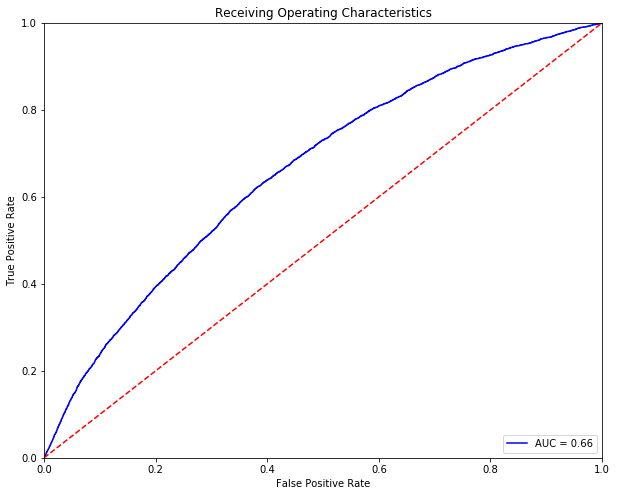

In [112]:
plt.figure(figsize=(10,8))
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_2)
auc_score = roc_auc_score(y_test, y_pred_prob_2)

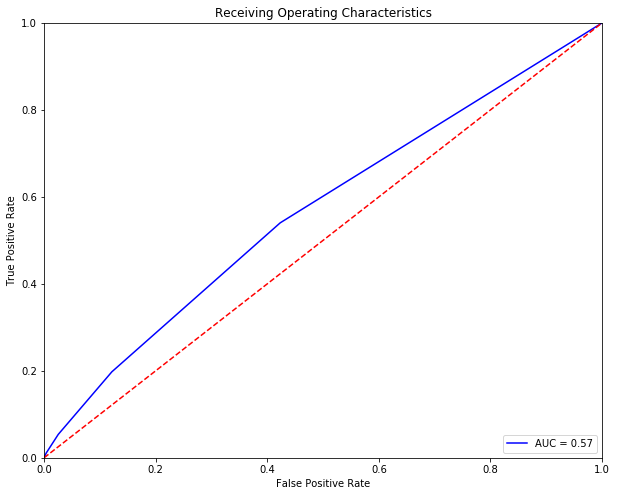

In [114]:
plt.figure(figsize=(10,8))
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [115]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [116]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_1

array([[48616,     0],
       [ 4627,     0]])

In [117]:
from sklearn.metrics import confusion_matrix
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_2

array([[48428,   188],
       [ 4576,    51]])

Confusion matrix, without normalization
[[48616     0]
 [ 4627     0]]


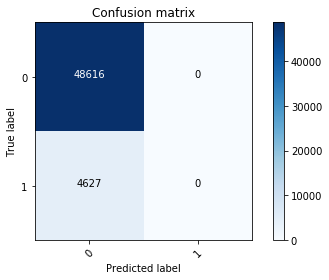

In [120]:
plot_confusion_matrix(cm_1, df.loan_status.unique())

Confusion matrix, without normalization
[[48428   188]
 [ 4576    51]]


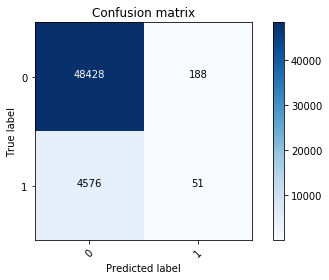

In [121]:
plot_confusion_matrix(cm_2, df.loan_status.unique())